In [2]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
dataset = 'model_create/continuous_gesture_history_850.csv'
model_weights_save_path = 'model_create/gesture_history.weights.h5'

In [4]:
NUM_CLASSES = 3
TIMESTAMPS = 24

RANDOM_SEED = 42

In [5]:
x_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, TIMESTAMPS + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [6]:
import tensorflow as tf

In [51]:
"""
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(shape=(TIMESTAMPS, )),
        #tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(24, activation='relu', input = (TIMESTAMPS, 1)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
"""

model = tf.keras.models.Sequential([
        tf.keras.layers.Input((TIMESTAMPS, )),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(48, activation='relu'),
        #tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(36, activation='relu'),
        #tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(24, activation='relu'),
        #tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(12, activation='relu'),
        #tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [52]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_9 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 36)             │         1,764 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 24)             │           888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,315 (16.86 KB)

 Trainable params: 4,315 (16.86 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_weights_save_path,
    verbose=1,
    save_weights_only=True)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20,
                                               verbose=1)

In [54]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 3s 987ms/step - accuracy: 0.1797 - loss: 1.4523
Epoch 1: saving model to model_create/gesture_history.weights.h5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2281 - loss: 1.3138 - val_accuracy: 0.3991 - val_loss: 1.0659
Epoch 2/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3359 - loss: 1.0710
Epoch 2: saving model to model_create/gesture_history.weights.h5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3957 - loss: 1.0422 - val_accuracy: 0.4695 - val_loss: 0.9862
Epoch 3/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3828 - loss: 1.0146
Epoch 3: saving model to model_create/gesture_history.weights.h5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4779 - loss: 0.9757 - val_accuracy: 0.5587 - val_loss: 0.9111
Epoch 4/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5859 - loss: 0.9178
Epoch 4: saving model to model_create/gesture_history.weights.h5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6105 

In [56]:
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9390 - loss: 0.1810 


In [57]:
predict_result = model.predict(np.array([x_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0.3051285  0.00891404 0.68595743]
2


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


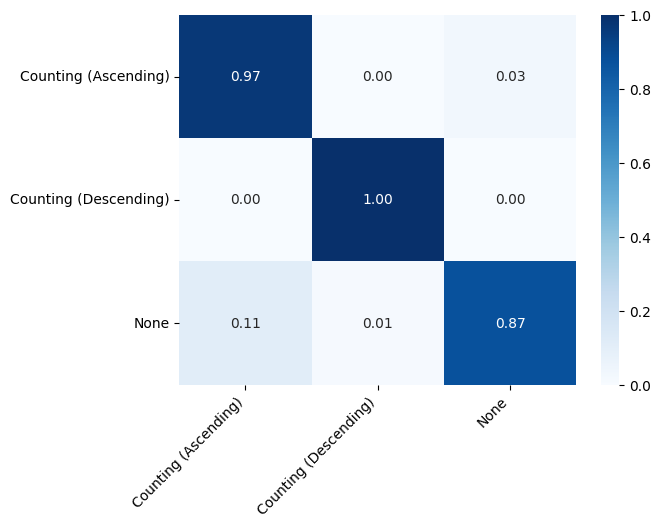

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        90
           1       0.98      1.00      0.99        52
           2       0.95      0.87      0.91        71

    accuracy                           0.94       213
   macro avg       0.95      0.95      0.95       213
weighted avg       0.94      0.94      0.94       213



In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    cmx_data = cmx_data.astype('float') / cmx_data.sum(axis=1)[:, np.newaxis]

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots()
    sns.heatmap(df_cmx, annot=True, fmt='.2f', cmap='Blues')
    ax.set_ylim(len(set(y_true)), 0)

    #plt.xlabel('Predicted'); plt.ylabel('True')
    xticks = ['Counting (Ascending)', 'Counting (Descending)', 'None']
    yticks = ['Counting (Ascending)', 'Counting (Descending)', 'None']
    plt.xticks(ticks=[i + 0.5 for i in range(len(xticks))], labels=xticks, rotation=45, ha="right")
    plt.yticks(ticks=[i + 0.5 for i in range(len(yticks))], labels=yticks, rotation=0)
    
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [15]:
pb_save_path = 'model_create/history_classification.pb'
model_h5_path = 'model_create/history_classification.h5'
#model.save(pb_save_path, save_format='tf')
model.save(model_h5_path)

In [16]:
tf.saved_model.save(model, pb_save_path)

INFO:tensorflow:Assets written to: model_create/history_classification.pb\assets


INFO:tensorflow:Assets written to: model_create/history_classification.pb\assets


In [17]:
#!zip -r classification.zip /model_create/classification.pb/  # 압축

In [18]:
# Convert Model
tflite_save_path = 'model_create/classification.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\SBwhq\AppData\Local\Temp\tmpfze2i7uf\assets


INFO:tensorflow:Assets written to: C:\Users\SBwhq\AppData\Local\Temp\tmpfze2i7uf\assets


Saved artifact at 'C:\Users\SBwhq\AppData\Local\Temp\tmpfze2i7uf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 24), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2404019116640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019121568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019114704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019310608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019306736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019307088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019309552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019311136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019312368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019313072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2404019310784:

12888